In [1]:
import os
print("student_model.pkl" in os.listdir())


True


In [8]:
import pandas as pd
import pickle

# Load model
with open("student_model.pkl", "rb") as file:
    model = pickle.load(file)

# Read the input
df = pd.read_csv("predict_input.csv")

# Fix column names
df.columns = df.columns.str.strip()

# Show debug info (optional)
print("Cleaned columns:", df.columns.tolist())
print(df.head())

# Select features
x = df[["attendance", "assignment_score"]]

# Predict
pred = model.predict(x)

# Add predictions to DataFrame
df["Predicted_Marks"] = pred

# Save to new file
df.to_csv("predict_out.csv", index=False)

print("✅ Predictions saved to predict_out.csv")


Cleaned columns: ['attendance', 'assignment_score', 'Predicted_Marks']
   attendance  assignment_score  Predicted_Marks
0          89                90            91.68
1          78                92            93.67
✅ Predictions saved to predict_out.csv


In [9]:
print(df.columns.tolist())


['attendance', 'assignment_score', 'Predicted_Marks']


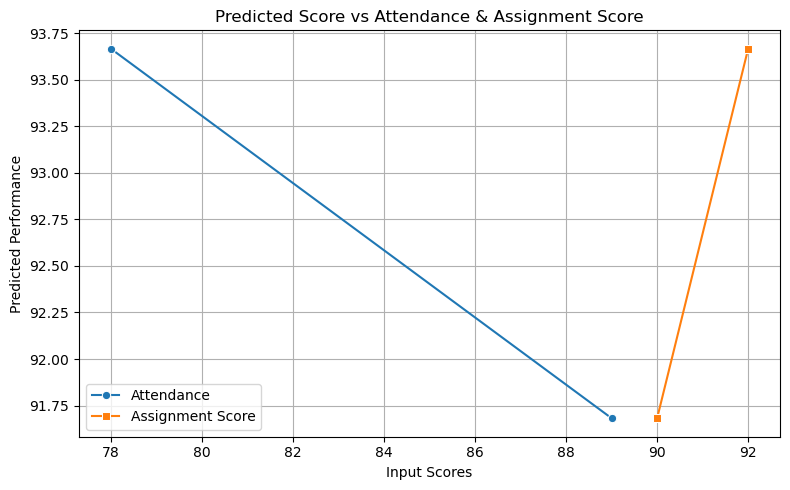

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the prediction results
df = pd.read_csv("predict_out.csv")

# Line chart for attendance vs predicted score
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x='attendance', y='Predicted_Marks', marker='o', label="Attendance")
sns.lineplot(data=df, x='assignment_score', y='Predicted_Marks', marker='s', label="Assignment Score")
plt.title("Predicted Score vs Attendance & Assignment Score")
plt.xlabel("Input Scores")
plt.ylabel("Predicted Performance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 800x500 with 0 Axes>

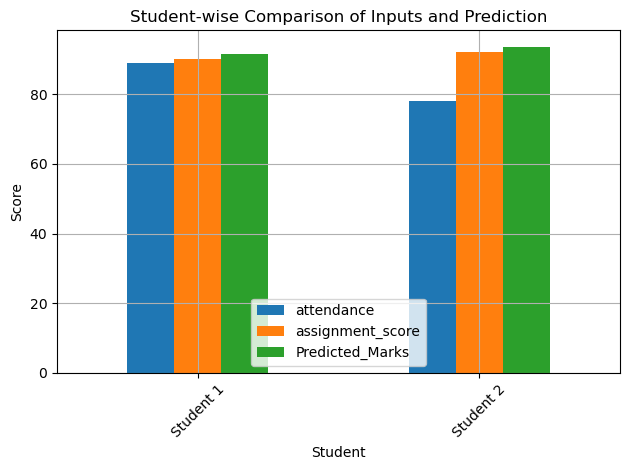

In [11]:
# Bar plot for individual prediction records
df.index = [f'Student {i+1}' for i in range(len(df))]

plt.figure(figsize=(8, 5))
df[['attendance', 'assignment_score', 'Predicted_Marks']].plot(kind='bar')
plt.title("Student-wise Comparison of Inputs and Prediction")
plt.xlabel("Student")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


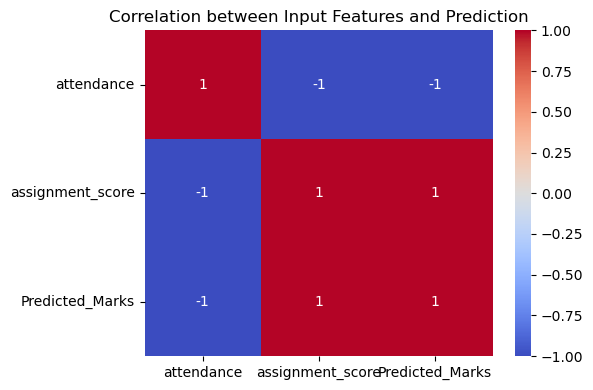

In [12]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between Input Features and Prediction")
plt.tight_layout()
plt.show()
